In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
df=pd.read_csv("placement.csv")

In [5]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [7]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

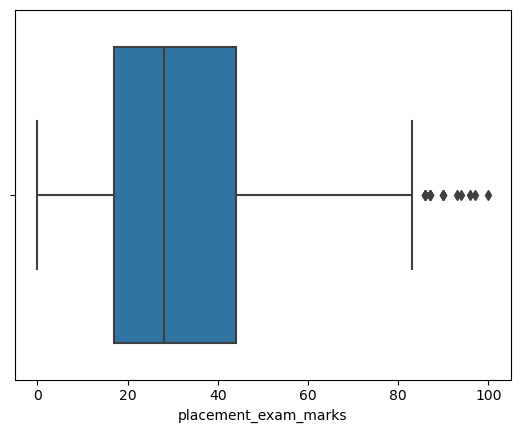

In [8]:
sns.boxplot(data=df,x='placement_exam_marks')

In [11]:
#find iqr
per25=df['placement_exam_marks'].quantile(0.25)
per75=df['placement_exam_marks'].quantile(0.75)

In [12]:
per25,per75

(17.0, 44.0)

In [14]:
iqr=per75-per25
iqr

27.0

In [19]:
upper_limet=per75+1.5*iqr
lower_limet=per25-1.5*iqr

In [20]:
print("upper limit",upper_limet)
print("lpwer_limit",lower_limet)

upper limit 84.5
lpwer_limit -23.5


In [22]:
(df['placement_exam_marks']>upper_limet).sum()

15

In [24]:
df[df['placement_exam_marks']>upper_limet]


,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [27]:
df[df['placement_exam_marks']<lower_limet]

,cgpa,placement_exam_marks,placed


# Triming

In [28]:
new_df=df[df['placement_exam_marks']<upper_limet]

In [31]:
new_df.shape,df.shape

((985, 3), (1000, 3))

C:\Users\raj\AppData\Local\Temp\ipykernel_23932\3272829250.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\raj\AppData\Local\Temp\ipykernel_23932\3272829250.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar fle

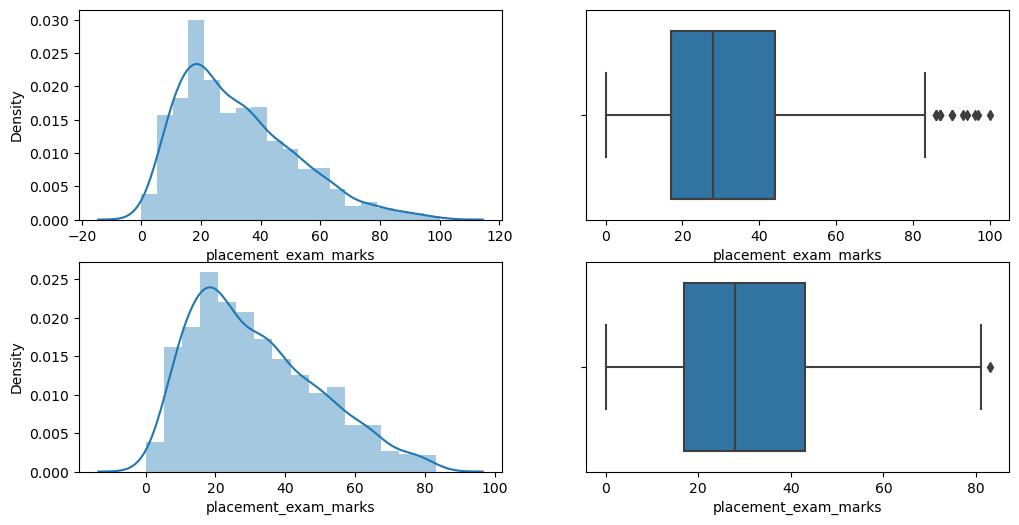

In [37]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(data=df,x='placement_exam_marks')

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(data=new_df,x='placement_exam_marks')

plt.show()

In [38]:
new_df_cap=df.copy()

# use of where np.where(condtion,true,false)

In [49]:
new_df_cap['placement_exam_marks']=np.where(
    new_df_cap['placement_exam_marks']>upper_limet,
    upper_limet,

    
    np.where(
        new_df_cap['placement_exam_marks']<lower_limet,
    lower_limet,
        new_df_cap['placement_exam_marks']
    )
)

In [45]:
new_df_cap['placement_exam_marks'].describe()

count    1000.000000
mean       32.136500
std        18.865419
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max        84.500000
Name: placement_exam_marks, dtype: float64

C:\Users\raj\AppData\Local\Temp\ipykernel_23932\4018783093.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\raj\AppData\Local\Temp\ipykernel_23932\4018783093.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar fle

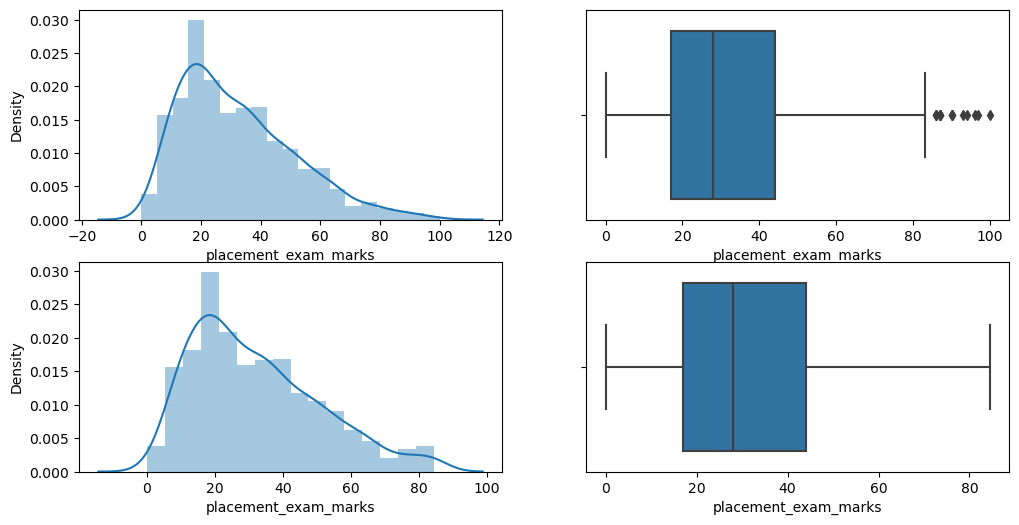

In [47]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(data=df,x='placement_exam_marks')

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(data=new_df_cap,x='placement_exam_marks')

plt.show()